<a href="https://colab.research.google.com/github/bao2206/Final-machine-learning/blob/HuuKhanh/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thêm các thư viện cần thiết cho bài toán


In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import random as rd
from sklearn.metrics import mean_squared_error, r2_score

Phân tích thống kê trên dữ liệu

In [2]:
# load the data
parkinsons_data = pd.read_csv('/content/drive/MyDrive/machinelearning/parkinsons.data')

In [3]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#check col and row
parkinsons_data.shape

(195, 24)

In [5]:
# getting information
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# checking for missing values
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [9]:
# grouping the data based on the target variable
parkinsons_data.groupby('status').mean()

<ipython-input-9-18cc9e82c57e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Tiền xử lý dữ liệu

> Chuẩn bị dữ liệu



In [10]:
feature_names = parkinsons_data.drop(columns=['name', 'status']).columns.tolist()
print("Feature Names:")
print(feature_names)

Feature Names:
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [11]:
# feature selection
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [12]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [13]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Chia tập dữ liệu vào tập train và test

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Chuẩn hóa dữ liệu

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

Các mô hình huấn luyện và đánh giá từng mô hình

XGBoost model


In [18]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, Y_train)
xgb_predicted = xgb.predict(X_test)

Sử dụng xgb model để đánh giá độ quan trọng của các feature

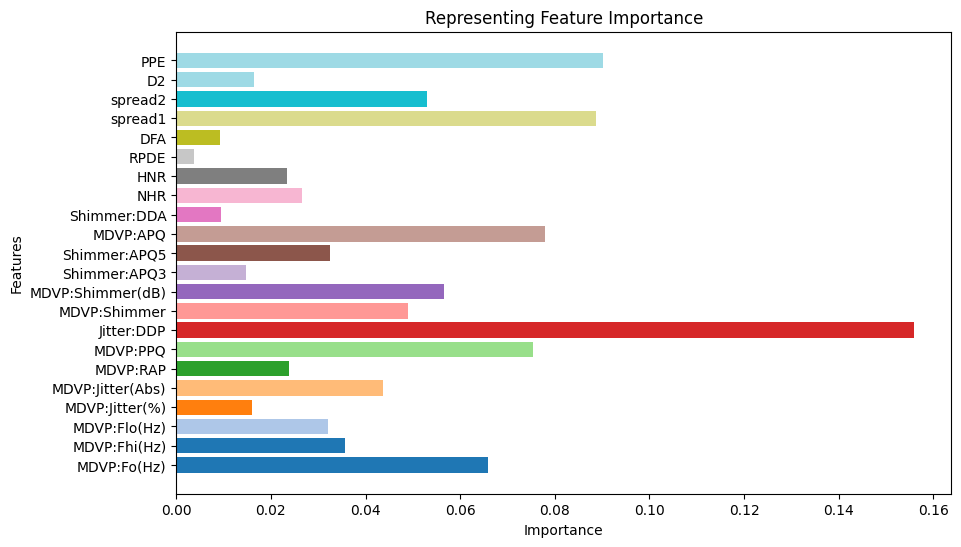

In [19]:
# list features
feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

# features importance
imp_feature = pd.DataFrame({'Feature': feature_names, 'Importance': xgb.feature_importances_})

# color
colors = plt.cm.tab20(np.linspace(0, 1, len(feature_names)))

# visual chart about importance of features using xgb model
plt.figure(figsize=(10, 6))
plt.title("Representing Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")

for i, (feature, color) in enumerate(zip(imp_feature['Feature'], colors)):
    plt.barh(feature, imp_feature.loc[i, 'Importance'], color=color)

plt.show()

Evaluation for classification

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Create a kNN classifier
knn = KNeighborsClassifier(n_neighbors=10)


knn.fit(X_train, Y_train)

# Predict on the training set
train_predictions = knn.predict(X_train)

# Evaluate performance on the training set
train_accuracy_kNN = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_kNN)

# Predict on the test set
test_predictions = knn.predict(X_test)

# Evaluate performance on the test set
test_accuracy_kNN = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_kNN)

# Classification report for test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))


Training Set Accuracy: 0.9423076923076923
Test Set Accuracy: 0.8717948717948718

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.96      0.87      0.92        31

    accuracy                           0.87        39
   macro avg       0.80      0.87      0.83        39
weighted avg       0.90      0.87      0.88        39



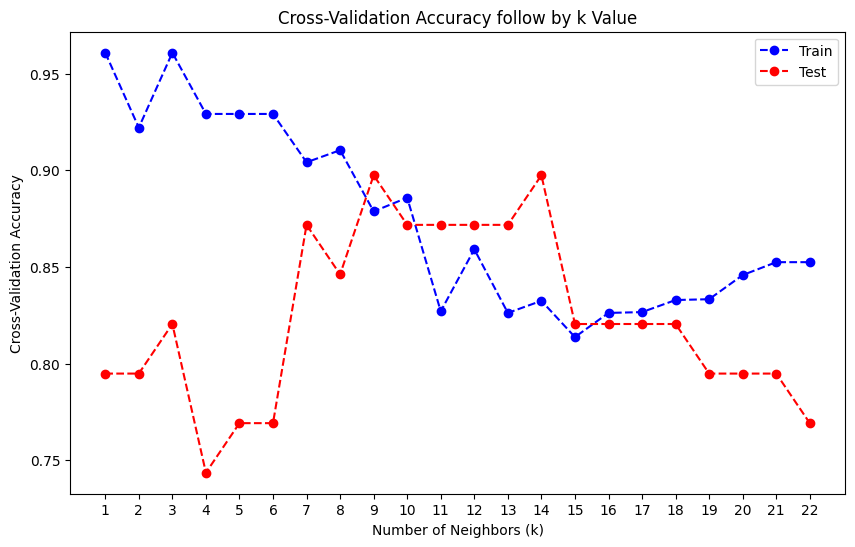

In [21]:
from sklearn.model_selection import cross_val_score

# Range of k values to explore
k_values = list(range(1, 23))  # Adjust the range as needed

# Empty lists to store mean cross-validation scores for each k
cv_scores_train = []
cv_scores_test = []

# Perform 10-fold cross-validation for each k
for k in k_values:
    # Initialize kNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Cross-validation on the training set
    scores_train = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')  # Adjust cv value as needed
    cv_scores_train.append(scores_train.mean())

    # Train the kNN model on the training data
    knn.fit(X_train, Y_train)

    # Evaluate the model on the test set
    test_predictions = knn.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    cv_scores_test.append(test_accuracy)

# Plotting the accuracy for different k values on both training and test sets
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_train, marker='o', linestyle='dashed', color='blue', label='Train')
plt.plot(k_values, cv_scores_test, marker='o', linestyle='dashed', color='red', label='Test')
plt.title('Cross-Validation Accuracy follow by k Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.legend()
plt.show()

In [22]:
#select k = 14

knn_overfitting = KNeighborsClassifier(n_neighbors=14)


knn_overfitting.fit(X_train, Y_train)

# Predict on the training set
train_predictions_overfitting = knn_overfitting.predict(X_train)

# Evaluate performance on the training set
train_accuracy_kNN_overfitting = accuracy_score(Y_train, train_predictions_overfitting)
print("Training Set Accuracy after using avoid overfitting:", train_accuracy_kNN_overfitting)

# Predict on the test set
test_predictions_overfitting = knn_overfitting.predict(X_test)

# Evaluate performance on the test set
test_accuracy_kNN_overfitting = accuracy_score(Y_test, test_predictions_overfitting)
print("Test Set Accuracy after using avoid overfitting:", test_accuracy_kNN_overfitting)

# Classification report for test set
print("\nClassification Report after using avoid overfitting:")
print(classification_report(Y_test, test_predictions_overfitting))

Training Set Accuracy after using avoid overfitting: 0.9166666666666666
Test Set Accuracy after using avoid overfitting: 0.8974358974358975

Classification Report after using avoid overfitting:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.97      0.90      0.93        31

    accuracy                           0.90        39
   macro avg       0.83      0.89      0.86        39
weighted avg       0.91      0.90      0.90        39



In [23]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_reg = LogisticRegression()

# Train the model on the training data
logistic_reg.fit(X_train, Y_train)

# Predict on the training set
train_predictions = logistic_reg.predict(X_train)

# Evaluate performance on the training set
train_accuracy_lr = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_lr)

# Predict on the test set
test_predictions = logistic_reg.predict(X_test)

# Evaluate performance on the test set
test_accuracy_lr = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_lr)

# Classification report for test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))

Training Set Accuracy: 0.8717948717948718
Test Set Accuracy: 0.8205128205128205

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


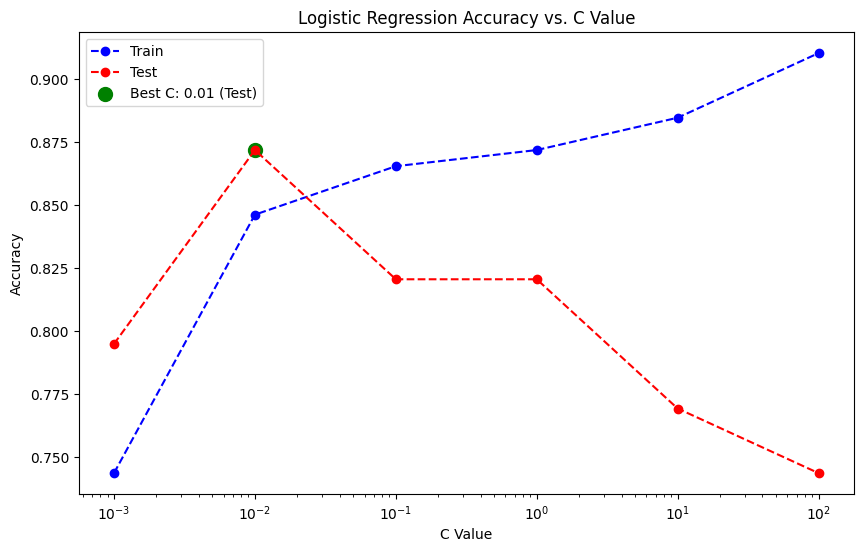

The best C value with highest accuracy on the test data is: 0.01


In [24]:
# Define a range of C values to explore
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Empty lists to store accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over each C value
for c in c_values:
    # Create a Logistic Regression classifier with the current C value
    logistic_reg = LogisticRegression(C=c)

    # Train the model on the training data
    logistic_reg.fit(X_train, Y_train)

    # Predict on the training set and calculate accuracy
    train_predictions = logistic_reg.predict(X_train)
    train_accuracy = accuracy_score(Y_train, train_predictions)
    train_accuracy_scores.append(train_accuracy)

    # Predict on the test set and calculate accuracy
    test_predictions = logistic_reg.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    test_accuracy_scores.append(test_accuracy)

# Find the index of the best C value based on test set accuracy
best_c_index = np.argmax(test_accuracy_scores)
best_c = c_values[best_c_index]

# Plotting accuracy scores for different C values
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_accuracy_scores, marker='o', linestyle='dashed', color='blue', label='Train')
plt.plot(c_values, test_accuracy_scores, marker='o', linestyle='dashed', color='red', label='Test')
plt.scatter(best_c, test_accuracy_scores[best_c_index], color='green', label=f'Best C: {best_c} (Test)', s=100)
plt.title('Logistic Regression Accuracy vs. C Value')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xscale('log')  # Since C values are on a logarithmic scale
plt.legend()
plt.show()

print(f"The best C value with highest accuracy on the test data is: {best_c}")

In [25]:
logistic_reg_overfitting = LogisticRegression(penalty='l2', C=best_c)

# Train the model on the training data
logistic_reg_overfitting.fit(X_train, Y_train)

# Predict on the training set
train_predictions_overfitting = logistic_reg_overfitting.predict(X_train)

# Evaluate performance on the training set
train_accuracy_lr_overfitting = accuracy_score(Y_train, train_predictions_overfitting)
print("Training Set Accuracy:", train_accuracy_lr_overfitting)

# Predict on the test set
test_predictions_overfitting = logistic_reg_overfitting.predict(X_test)

# Evaluate performance on the test set
test_accuracy_lr_overfitting = accuracy_score(Y_test, test_predictions_overfitting)
print("Test Set Accuracy:", test_accuracy_lr_overfitting)

# Classification report for the test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions_overfitting))

Training Set Accuracy: 0.8461538461538461
Test Set Accuracy: 0.8717948717948718

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.86      1.00      0.93        31

    accuracy                           0.87        39
   macro avg       0.93      0.69      0.74        39
weighted avg       0.89      0.87      0.85        39



In [26]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model on the training data
naive_bayes.fit(X_train, Y_train)

# Predict on the training set
train_predictions = naive_bayes.predict(X_train)

# Evaluate performance on the training set
train_accuracy_nb = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_nb)

# Predict on the test set
test_predictions = naive_bayes.predict(X_test)

# Evaluate performance on the test set
test_accuracy_nb = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_nb)

# Classification report for test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))


Training Set Accuracy: 0.7243589743589743
Test Set Accuracy: 0.6153846153846154

Classification Report:
              precision    recall  f1-score   support

           0       0.35      1.00      0.52         8
           1       1.00      0.52      0.68        31

    accuracy                           0.62        39
   macro avg       0.67      0.76      0.60        39
weighted avg       0.87      0.62      0.65        39



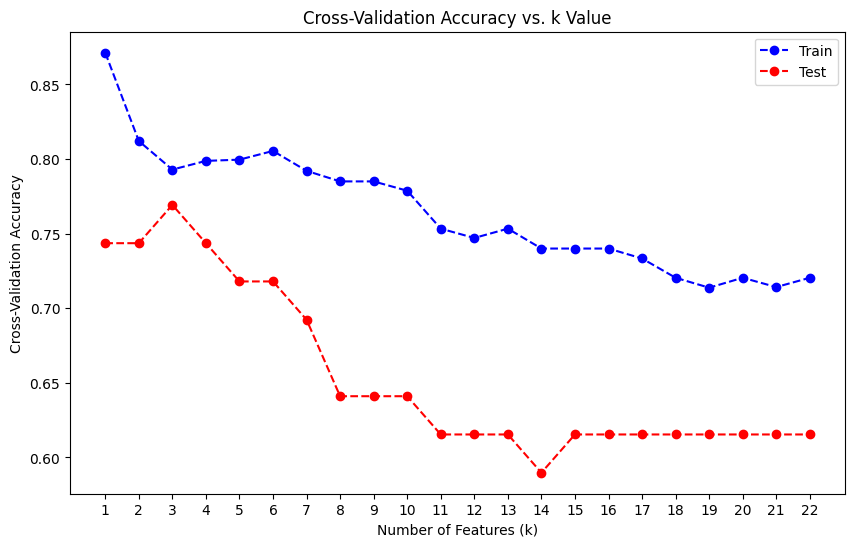

The best k value with highest accuracy on the test data is: 3


In [27]:
from sklearn.feature_selection import SelectKBest, f_classif
k_values = list(range(1, X_train.shape[1] + 1))

# Empty lists to store mean cross-validation scores for each k
cv_scores_train = []
cv_scores_test = []

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, Y_train)
    X_test_selected = selector.transform(X_test)

    nb = GaussianNB()

    # Perform cross-validation on training set
    scores_train = cross_val_score(nb, X_train_selected, Y_train, cv=10, scoring='accuracy')
    cv_scores_train.append(scores_train.mean())

    # Fit the model on the entire training set
    nb.fit(X_train_selected, Y_train)

    # Evaluate on the test set
    test_predictions = nb.predict(X_test_selected)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    cv_scores_test.append(test_accuracy)

# Plotting the accuracy for different k values on both training and test sets
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_train, marker='o', linestyle='dashed', color='blue', label='Train')
plt.plot(k_values, cv_scores_test, marker='o', linestyle='dashed', color='red', label='Test')
plt.title('Cross-Validation Accuracy vs. k Value')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.legend()
plt.show()
best_k_index = np.argmax(cv_scores_test)
best_k = k_values[best_k_index]

print(f"The best k value with highest accuracy on the test data is: {best_k}")

In [28]:
selector = SelectKBest(score_func=f_classif, k=best_k)  # Adjust k as needed

# Fit selector and transform the training and test sets
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model on the selected features
naive_bayes.fit(X_train_selected, Y_train)

# Predict on the training set
train_predictions = naive_bayes.predict(X_train_selected)

# Evaluate performance on the training set
train_accuracy_nb = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_nb)

# Predict on the test set using the selected features
test_predictions = naive_bayes.predict(X_test_selected)

# Evaluate performance on the test set
test_accuracy_nb = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_nb)

# Classification report for the test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))

Training Set Accuracy: 0.8012820512820513
Test Set Accuracy: 0.7692307692307693

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.89      0.81      0.85        31

    accuracy                           0.77        39
   macro avg       0.67      0.72      0.69        39
weighted avg       0.80      0.77      0.78        39



In [29]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(X_train, Y_train)

# Predict on the training set
train_predictions = decision_tree.predict(X_train)

# Evaluate performance on the training set
train_accuracy_dt = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_dt)

# Predict on the test set
test_predictions = decision_tree.predict(X_test)

# Evaluate performance on the test set
test_accuracy_dt = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_dt)

# Classification report for test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))


Training Set Accuracy: 1.0
Test Set Accuracy: 0.7435897435897436

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy                           0.74        39
   macro avg       0.70      0.79      0.70        39
weighted avg       0.85      0.74      0.77        39



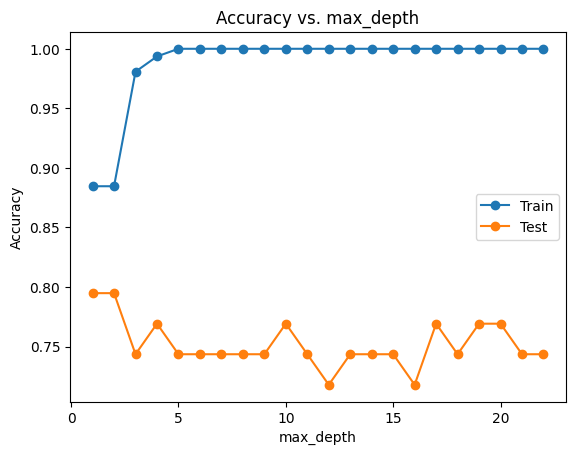

Best max_depth: 1


In [30]:
max_depth_values = range(1, 23)  # You can adjust the range

# Lists to store accuracies on train and test sets for each max_depth
train_accuracies = []
test_accuracies = []

# Iterate over different max_depth values
for depth in max_depth_values:
    # Create Decision Tree classifier with current max_depth
    decision_tree = DecisionTreeClassifier(max_depth=depth)

    # Train the model on the training data
    decision_tree.fit(X_train, Y_train)

    # Predict on the training set
    train_predictions = decision_tree.predict(X_train)

    # Evaluate performance on the training set
    train_accuracy = accuracy_score(Y_train, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predict on the test set
    test_predictions = decision_tree.predict(X_test)

    # Evaluate performance on the test set
    test_accuracy = accuracy_score(Y_test, test_predictions)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies for different max_depth values
plt.plot(max_depth_values, train_accuracies, marker='o', label='Train')
plt.plot(max_depth_values, test_accuracies, marker='o', label='Test')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth')
plt.legend()
plt.show()
best_max_depth = max_depth_values[test_accuracies.index(max(test_accuracies))]
print(f"Best max_depth: {best_max_depth}")

In [31]:
# Create a Decision Tree classifier with the best max_depth
best_decision_tree = DecisionTreeClassifier(max_depth=1)

# Train the model on the training data
best_decision_tree.fit(X_train, Y_train)

# Predict on the training set
train_predictions = best_decision_tree.predict(X_train)

# Evaluate performance on the training set
train_accuracy = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy)

# Predict on the test set
test_predictions = best_decision_tree.predict(X_test)

# Evaluate performance on the test set
test_accuracy = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy)


Training Set Accuracy: 0.8846153846153846
Test Set Accuracy: 0.7948717948717948


Evaluation for regression

In [32]:
from sklearn.svm import SVR

# Create an SVR model
svm_regressor = SVR(kernel='rbf')

# Train the model on the training data
svm_regressor.fit(X_train, Y_train)

# Predict on the training set
train_predictions = svm_regressor.predict(X_train)

# Evaluate performance on the training set
train_rmse_svr = mean_squared_error(Y_train, train_predictions, squared=False)
train_r2_svr = r2_score(Y_train, train_predictions)
print("Training Set RMSE:", train_rmse_svr)
print("Training Set R-squared:", train_r2_svr)

# Predict on the test set
test_predictions = svm_regressor.predict(X_test)

# Evaluate performance on the test set
test_rmse_svr = mean_squared_error(Y_test, test_predictions, squared=False)
test_r2_svr = r2_score(Y_test, test_predictions)
print("\nTest Set RMSE:", test_rmse_svr)
print("Test Set R-squared:", test_r2_svr)


Training Set RMSE: 0.22094211974258868
Training Set R-squared: 0.7439715371023246

Test Set RMSE: 0.31443119900170863
Test Set R-squared: 0.39364243985686764


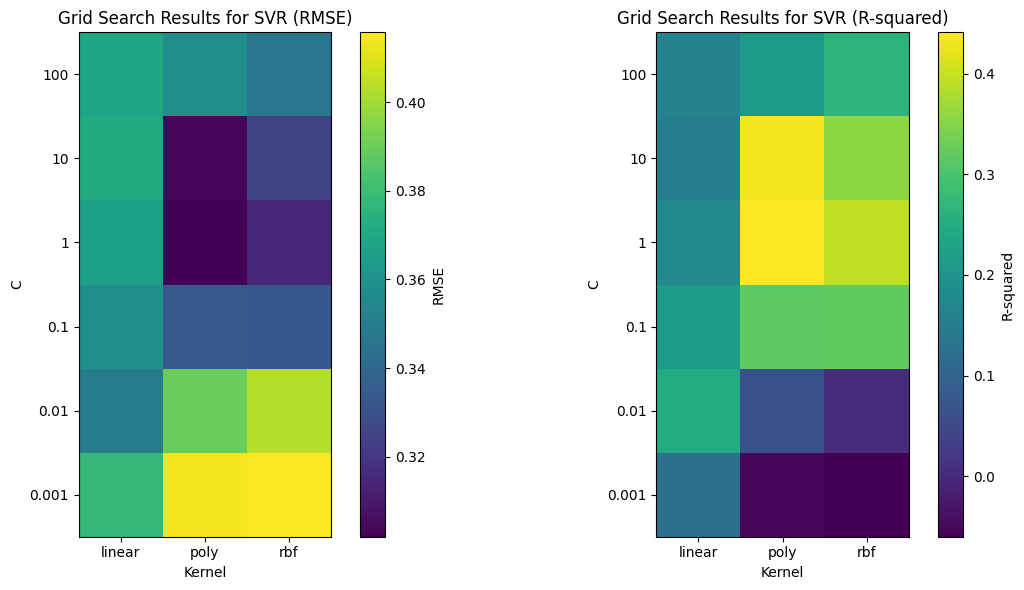

In [33]:
from sklearn.model_selection import GridSearchCV
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'rbf']
rmse_matrix = np.zeros((len(C_values), len(kernels)))
r2_matrix = np.zeros((len(C_values), len(kernels)))
# Perform GridSearchCV for hyperparameter tuning
for i, C in enumerate(C_values):
    for j, kernel in enumerate(kernels):
        svm_regressor = SVR(C=C, kernel=kernel)
        svm_regressor.fit(X_train, Y_train)
        test_predictions = svm_regressor.predict(X_test)
        rmse = mean_squared_error(Y_test, test_predictions, squared=False)
        r2 = r2_score(Y_test, test_predictions)
        rmse_matrix[i, j] = rmse
        r2_matrix[i, j] = r2

# Plotting the heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rmse_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='RMSE')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.title('Grid Search Results for SVR (RMSE)')
plt.xticks(np.arange(len(kernels)), kernels)
plt.yticks(np.arange(len(C_values)), C_values)
plt.gca().invert_yaxis()  # Invert y-axis to match the order of C values

plt.subplot(1, 2, 2)
plt.imshow(r2_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='R-squared')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.title('Grid Search Results for SVR (R-squared)')
plt.xticks(np.arange(len(kernels)), kernels)
plt.yticks(np.arange(len(C_values)), C_values)
plt.gca().invert_yaxis()  # Invert y-axis to match the order of C values

plt.tight_layout()
plt.show()

In [34]:
best_svr = SVR(kernel='poly', C=1)
best_svr.fit(X_train, Y_train)

# Evaluate performance on the test set
test_predictions = best_svr.predict(X_test)
test_rmse_svr = mean_squared_error(Y_test, test_predictions, squared=False)
test_r2_svr = r2_score(Y_test, test_predictions)

print("Test Set RMSE:", test_rmse_svr)
print("Test Set R-squared:", test_r2_svr)

Test Set RMSE: 0.3019278488163212
Test Set R-squared: 0.4409072266936095


In [35]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, Y_train)

# Predict on the training set
train_predictions = linear_regressor.predict(X_train)

# Evaluate performance on the training set
train_rmse_lir = mean_squared_error(Y_train, train_predictions, squared=False)
train_r2_lir = r2_score(Y_train, train_predictions)
print("Training Set RMSE:", train_rmse_lir)
print("Training Set R-squared:", train_r2_lir)

# Predict on the test set
test_predictions = linear_regressor.predict(X_test)

# Evaluate performance on the test set
test_rmse_lir = mean_squared_error(Y_test, test_predictions, squared=False)
test_r2_lir = r2_score(Y_test, test_predictions)
print("\nTest Set RMSE:", test_rmse_lir)
print("Test Set R-squared:", test_r2_lir)


Training Set RMSE: 0.2929078736208478
Training Set R-squared: 0.5500198996046874

Test Set RMSE: 0.3793886062341583
Test Set R-squared: 0.11723297654922549


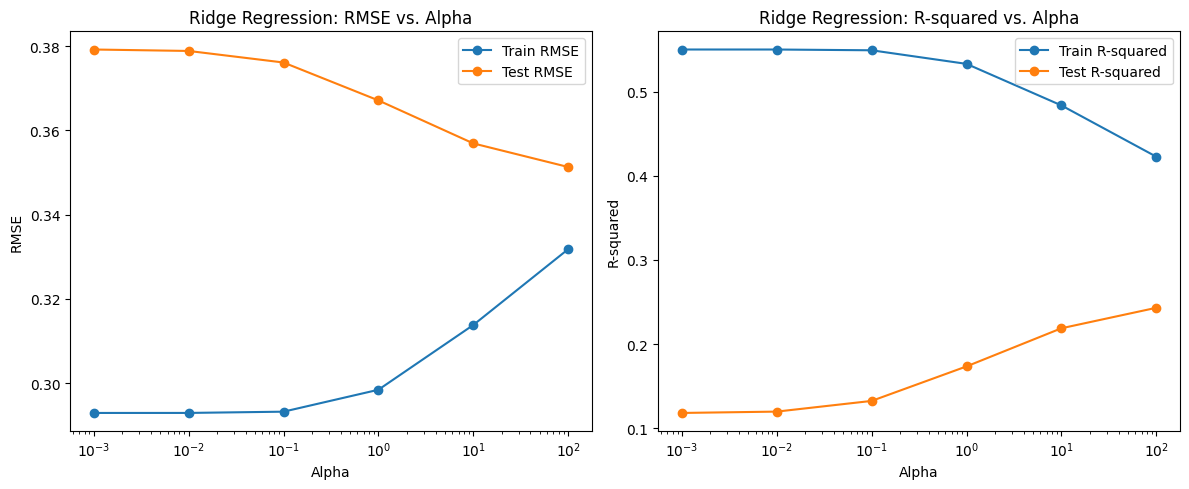

In [36]:
from sklearn.linear_model import Ridge

# Define a range of alpha values to search
alphas = [0.001, 0.01, 0.1, 1, 10, 100]  # Adjust the range as needed

train_rmse_scores = []
test_rmse_scores = []
train_r2_scores = []
test_r2_scores = []

for alpha in alphas:
    # Create Ridge regression model
    ridge = Ridge(alpha=alpha)

    # Train the model on the training data
    ridge.fit(X_train, Y_train)

    # Predict on training set and calculate RMSE and R-squared
    train_predictions = ridge.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(Y_train, train_predictions))
    train_r2 = r2_score(Y_train, train_predictions)
    train_rmse_scores.append(train_rmse)
    train_r2_scores.append(train_r2)

    # Predict on test set and calculate RMSE and R-squared
    test_predictions = ridge.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(Y_test, test_predictions))
    test_r2 = r2_score(Y_test, test_predictions)
    test_rmse_scores.append(test_rmse)
    test_r2_scores.append(test_r2)

# Plotting RMSE scores for different alpha values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, train_rmse_scores, marker='o', label='Train RMSE')
plt.plot(alphas, test_rmse_scores, marker='o', label='Test RMSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Ridge Regression: RMSE vs. Alpha')
plt.legend()

# Plotting R-squared scores for different alpha values
plt.subplot(1, 2, 2)
plt.plot(alphas, train_r2_scores, marker='o', label='Train R-squared')
plt.plot(alphas, test_r2_scores, marker='o', label='Test R-squared')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('Ridge Regression: R-squared vs. Alpha')
plt.legend()

plt.tight_layout()
plt.show()


In [37]:
ridge_regressor = Ridge(alpha=100)  # Adjust alpha (regularization strength) as needed

# Train the model on the training data
ridge_regressor.fit(X_train, Y_train)

# Predict on the training set
train_predictions = ridge_regressor.predict(X_train)

# Evaluate performance on the training set
train_rmse_ridge = mean_squared_error(Y_train, train_predictions, squared=False)
train_r2_ridge = r2_score(Y_train, train_predictions)
print("Training Set RMSE (Ridge):", train_rmse_ridge)
print("Training Set R-squared (Ridge):", train_r2_ridge)

# Predict on the test set
test_predictions = ridge_regressor.predict(X_test)

# Evaluate performance on the test set
test_rmse_ridge = mean_squared_error(Y_test, test_predictions, squared=False)
test_r2_ridge = r2_score(Y_test, test_predictions)
print("\nTest Set RMSE (Ridge):", test_rmse_ridge)
print("Test Set R-squared (Ridge):", test_r2_ridge)

Training Set RMSE (Ridge): 0.3318029821983383
Training Set R-squared (Ridge): 0.4225800479569789

Test Set RMSE (Ridge): 0.3513160400362367
Test Set R-squared (Ridge): 0.2430390236296952


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training data
random_forest_regressor.fit(X_train, Y_train)

# Predict on the training set
train_predictions = random_forest_regressor.predict(X_train)

# Evaluate performance on the training set
train_rmse_rr = mean_squared_error(Y_train, train_predictions, squared=False)
train_r2_rr = r2_score(Y_train, train_predictions)
print("Training Set RMSE:", train_rmse_rr)
print("Training Set R-squared:", train_r2_rr)

# Predict on the test set
test_predictions = random_forest_regressor.predict(X_test)

# Evaluate performance on the test set
test_rmse_rr = mean_squared_error(Y_test, test_predictions, squared=False)
test_r2_rr = r2_score(Y_test, test_predictions)
print("\nTest Set RMSE:", test_rmse_rr)
print("Test Set R-squared:", test_r2_rr)


Training Set RMSE: 0.10099504938362078
Training Set R-squared: 0.9465027586206897

Test Set RMSE: 0.3223034085756575
Test Set R-squared: 0.3629004032258064


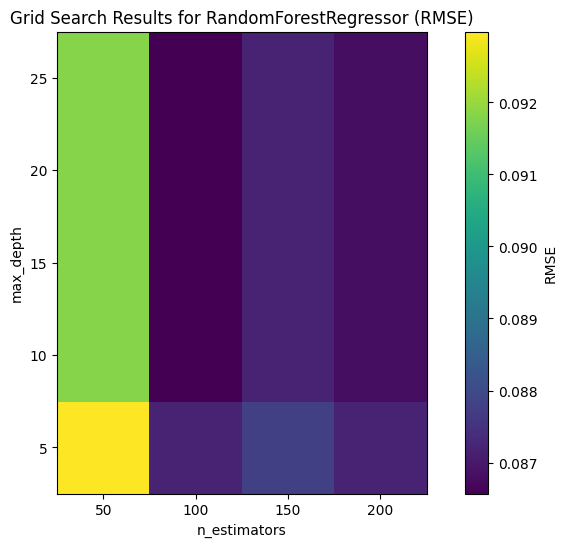

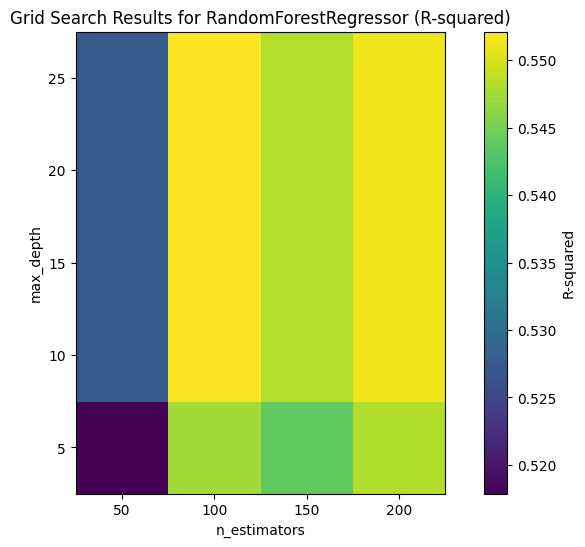

Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [39]:
# Define the hyperparameters for the grid search
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],  # Adjust the range as needed
    'n_estimators': [50, 100, 150, 200]  # Adjust the range as needed
}

# Create a Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid,
                           scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

# Extract the results
results = grid_search.cv_results_
rmse_scores = -results['mean_test_neg_mean_squared_error'].reshape(len(param_grid['max_depth']), -1)
r2_scores = results['mean_test_r2'].reshape(len(param_grid['max_depth']), -1)

# Plotting RMSE heatmap
plt.figure(figsize=(10, 6))
plt.imshow(rmse_scores, cmap='viridis', interpolation='nearest')
plt.colorbar(label='RMSE')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Results for RandomForestRegressor (RMSE)')
plt.xticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.yticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.gca().invert_yaxis()  # Invert y-axis to match the order of max_depth values
plt.show()

# Plotting R-squared heatmap
plt.figure(figsize=(10, 6))
plt.imshow(r2_scores, cmap='viridis', interpolation='nearest')
plt.colorbar(label='R-squared')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Results for RandomForestRegressor (R-squared)')
plt.xticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.yticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.gca().invert_yaxis()  # Invert y-axis to match the order of max_depth values
plt.show()

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [40]:
# Create a Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(max_depth=10, random_state=42)

# Train the model on the training data
random_forest_regressor.fit(X_train, Y_train)

# Predict on the training set
train_predictions = random_forest_regressor.predict(X_train)

# Evaluate performance on the training set
train_rmse_rr = mean_squared_error(Y_train, train_predictions, squared=False)
train_r2_rr = r2_score(Y_train, train_predictions)
print("Training Set RMSE:", train_rmse_rr)
print("Training Set R-squared:", train_r2_rr)

# Predict on the test set
test_predictions = random_forest_regressor.predict(X_test)

# Evaluate performance on the test set
test_rmse_rr = mean_squared_error(Y_test, test_predictions, squared=False)
test_r2_rr = r2_score(Y_test, test_predictions)
print("\nTest Set RMSE:", test_rmse_rr)
print("Test Set R-squared:", test_r2_rr)

Training Set RMSE: 0.10099504938362078
Training Set R-squared: 0.9465027586206897

Test Set RMSE: 0.3223034085756575
Test Set R-squared: 0.3629004032258064


In [41]:
# Create a DataFrame to display test accuracy scores for each model
test_accuracy_df = pd.DataFrame({
    'Model': ['kNN', 'Logistic Regression', 'GaussianNB', 'Decision Trees'],
    'Test Accuracy': [test_accuracy_kNN  * 100, test_accuracy_lr * 100, test_accuracy_nb * 100, test_accuracy_dt * 100]
})
test_accuracy_df

,Model,Test Accuracy
0,kNN,87.179487
1,Logistic Regression,82.051282
2,GaussianNB,76.923077
3,Decision Trees,74.358974


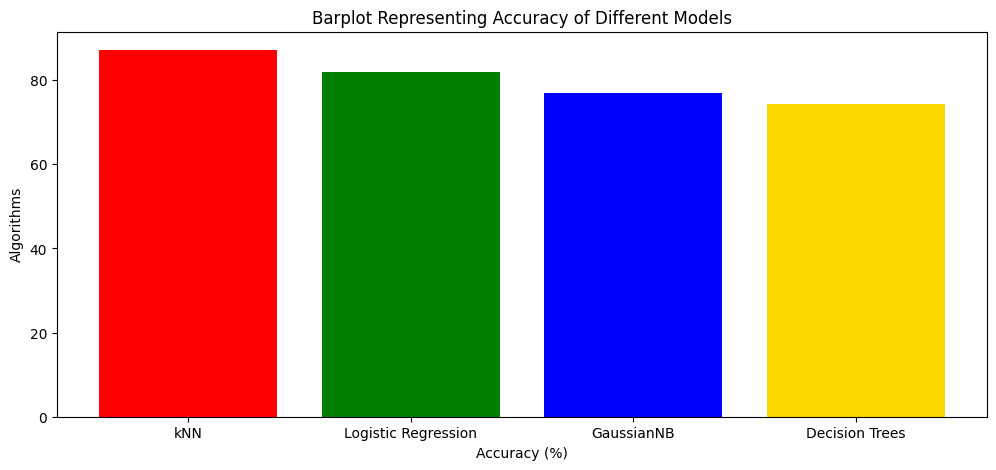

In [42]:
colors = ['red', 'green', 'blue', 'gold']  # Define colors for each model

plt.figure(figsize=(12, 5))
plt.title("Barplot Representing Accuracy of Different Models")
plt.xlabel("Accuracy (%)")
plt.ylabel("Algorithms")
plt.bar(test_accuracy_df['Model'], test_accuracy_df['Test Accuracy'], color=colors)
plt.show()

In [43]:
test_metrics_df = pd.DataFrame({
    'Model': ['SVR', 'Linear Regression', 'RandomForestRegressor'],
    'Mean Squared Error': [test_rmse_svr*100, test_rmse_lir*100, test_rmse_rr*100],
    'R2 Score': [test_r2_svr*100, test_r2_lir*100, test_r2_rr*100]
})
test_metrics_df

,Model,Mean Squared Error,R2 Score
0,SVR,30.192785,44.090723
1,Linear Regression,37.938861,11.723298
2,RandomForestRegressor,32.230341,36.290040


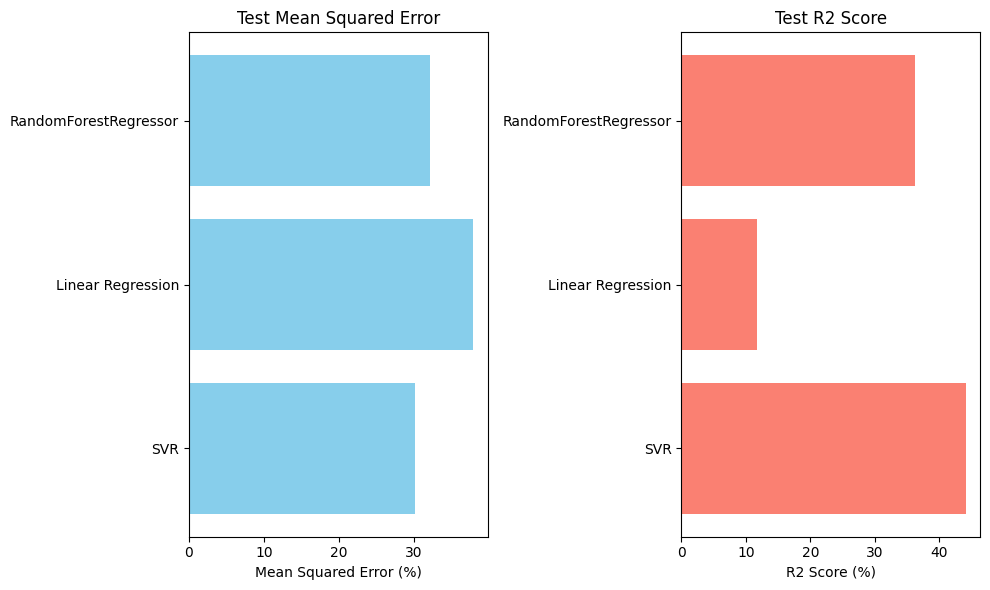

In [44]:
# Plotting Mean Squared Error and R2 Score
plt.figure(figsize=(10, 6))

# Mean Squared Error
plt.subplot(1, 2, 1)
plt.barh(test_metrics_df['Model'], test_metrics_df['Mean Squared Error'], color='skyblue')
plt.xlabel('Mean Squared Error (%)')
plt.title('Test Mean Squared Error')

# R2 Score
plt.subplot(1, 2, 2)
plt.barh(test_metrics_df['Model'], test_metrics_df['R2 Score'], color='salmon')
plt.xlabel('R2 Score (%)')
plt.title('Test R2 Score')

plt.tight_layout()
plt.show()

Deep Learning


In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam


 Feed Forward Neural Network

In [46]:
# Create a Sequential model
model_FFNN = Sequential()

# Add layers to the model
model_FFNN.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer with 64 neurons and ReLU activation
model_FFNN.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model_FFNN.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification) and sigmoid activation

# Compile the model
model_FFNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_FFNN.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test), verbose=1)


Epoch 1/30
5/5 [==============================] - 3s 65ms/step - loss: 0.8380 - accuracy: 0.3013 - val_loss: 0.7240 - val_accuracy: 0.3846
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6950 - accuracy: 0.5321 - val_loss: 0.6497 - val_accuracy: 0.6667
Epoch 3/30
5/5 [==============================] - 0s 14ms/step - loss: 0.5950 - accuracy: 0.7308 - val_loss: 0.5949 - val_accuracy: 0.6667
Epoch 4/30
5/5 [==============================] - 0s 14ms/step - loss: 0.5318 - accuracy: 0.7949 - val_loss: 0.5478 - val_accuracy: 0.8205
Epoch 5/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4788 - accuracy: 0.8526 - val_loss: 0.5084 - val_accuracy: 0.8205
Epoch 6/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4386 - accuracy: 0.8462 - val_loss: 0.4750 - val_accuracy: 0.7692
Epoch 7/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4068 - accuracy: 0.8718 - val_loss: 0.4499 - val_accuracy: 0.7949
Epoch 8/30
5/5 [===========

In [47]:
test_loss_FFNN, test_accuracy_FFNN = model_FFNN.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy_FFNN * 100:.2f}%")

2/2 [==============================] - 0s 7ms/step - loss: 0.3752 - accuracy: 0.7179
Test Accuracy: 71.79%


In [51]:
from keras.layers import Dropout
from keras import regularizers
# Create a Sequential model
model_FFNN = Sequential()

# Add layers to the model
model_FFNN.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Input layer with 64 neurons and ReLU activation
model_FFNN.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model_FFNN.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification) and sigmoid activation


# Compile the model
model_FFNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_FFNN.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test), verbose=1)


Epoch 1/30
5/5 [==============================] - 4s 111ms/step - loss: 0.9660 - accuracy: 0.6090 - val_loss: 0.9355 - val_accuracy: 0.6667
Epoch 2/30
5/5 [==============================] - 0s 27ms/step - loss: 0.8873 - accuracy: 0.7115 - val_loss: 0.8804 - val_accuracy: 0.7949
Epoch 3/30
5/5 [==============================] - 0s 20ms/step - loss: 0.8268 - accuracy: 0.7821 - val_loss: 0.8342 - val_accuracy: 0.8205
Epoch 4/30
5/5 [==============================] - 0s 27ms/step - loss: 0.7792 - accuracy: 0.8077 - val_loss: 0.7957 - val_accuracy: 0.8205
Epoch 5/30
5/5 [==============================] - 0s 17ms/step - loss: 0.7367 - accuracy: 0.8205 - val_loss: 0.7643 - val_accuracy: 0.7949
Epoch 6/30
5/5 [==============================] - 0s 14ms/step - loss: 0.7035 - accuracy: 0.8269 - val_loss: 0.7367 - val_accuracy: 0.7692
Epoch 7/30
5/5 [==============================] - 0s 14ms/step - loss: 0.6726 - accuracy: 0.8269 - val_loss: 0.7103 - val_accuracy: 0.7949
Epoch 8/30
5/5 [==========

In [52]:
test_loss_FFNN, test_accuracy_FFNN = model_FFNN.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy_FFNN * 100:.2f}%")

2/2 [==============================] - 0s 6ms/step - loss: 0.4969 - accuracy: 0.7692
Test Accuracy: 76.92%


Reccurent Neural Network

In [ ]:

# Reshape the data for LSTM (assuming X_train and X_test are 2D arrays)
X_train_RNN = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_RNN = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create a Sequential model
model_RNN = Sequential()

# Add an LSTM layer
model_RNN.add(LSTM(64, input_shape=(X_train_RNN.shape[1], X_train_RNN.shape[2])))

# Add a Dense output layer for binary classification
model_RNN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_RNN.fit(X_train_RNN, Y_train, epochs=30, batch_size=32, validation_data=(X_test_RNN, Y_test), verbose=1)


Epoch 1/30
5/5 [==============================] - 9s 279ms/step - loss: 0.6707 - accuracy: 0.6731 - val_loss: 0.6702 - val_accuracy: 0.5385
Epoch 2/30
5/5 [==============================] - 0s 35ms/step - loss: 0.6362 - accuracy: 0.6923 - val_loss: 0.6566 - val_accuracy: 0.5641
Epoch 3/30
5/5 [==============================] - 0s 36ms/step - loss: 0.6043 - accuracy: 0.7115 - val_loss: 0.6441 - val_accuracy: 0.5641
Epoch 4/30
5/5 [==============================] - 0s 21ms/step - loss: 0.5799 - accuracy: 0.7179 - val_loss: 0.6316 - val_accuracy: 0.5641
Epoch 5/30
5/5 [==============================] - 0s 31ms/step - loss: 0.5600 - accuracy: 0.7179 - val_loss: 0.6191 - val_accuracy: 0.5641
Epoch 6/30
5/5 [==============================] - 0s 21ms/step - loss: 0.5422 - accuracy: 0.7436 - val_loss: 0.6068 - val_accuracy: 0.5897
Epoch 7/30
5/5 [==============================] - 0s 23ms/step - loss: 0.5250 - accuracy: 0.7564 - val_loss: 0.5949 - val_accuracy: 0.6154
Epoch 8/30
5/5 [==========

In [ ]:
test_loss_RNN, test_accuracy_RNN = model_RNN.evaluate(X_test_RNN, Y_test)
print(f"Test Accuracy: {test_accuracy_RNN * 100:.2f}%")

2/2 [==============================] - 0s 8ms/step - loss: 0.3951 - accuracy: 0.8205
Test Accuracy: 82.05%


In [54]:
from keras.layers import Dropout
# Reshape the data for LSTM (assuming X_train and X_test are 2D arrays)
X_train_RNN = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_RNN = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create a Sequential model
model_RNN = Sequential()

# Add an LSTM layer
model_RNN.add(LSTM(64, input_shape=(X_train_RNN.shape[1], X_train_RNN.shape[2]), recurrent_dropout=0.2))

# Add a Dense output layer for binary classification
model_RNN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_RNN.fit(X_train_RNN, Y_train, epochs=30, batch_size=32, validation_data=(X_test_RNN, Y_test), verbose=1)


Epoch 1/30
5/5 [==============================] - 6s 90ms/step - loss: 0.6951 - accuracy: 0.4615 - val_loss: 0.6808 - val_accuracy: 0.6667
Epoch 2/30
5/5 [==============================] - 0s 17ms/step - loss: 0.6598 - accuracy: 0.6667 - val_loss: 0.6658 - val_accuracy: 0.6154
Epoch 3/30
5/5 [==============================] - 0s 15ms/step - loss: 0.6278 - accuracy: 0.6795 - val_loss: 0.6523 - val_accuracy: 0.6154
Epoch 4/30
5/5 [==============================] - 0s 18ms/step - loss: 0.6019 - accuracy: 0.6987 - val_loss: 0.6405 - val_accuracy: 0.6154
Epoch 5/30
5/5 [==============================] - 0s 14ms/step - loss: 0.5798 - accuracy: 0.7051 - val_loss: 0.6291 - val_accuracy: 0.6410
Epoch 6/30
5/5 [==============================] - 0s 14ms/step - loss: 0.5600 - accuracy: 0.7115 - val_loss: 0.6164 - val_accuracy: 0.6410
Epoch 7/30
5/5 [==============================] - 0s 15ms/step - loss: 0.5423 - accuracy: 0.7179 - val_loss: 0.6033 - val_accuracy: 0.6410
Epoch 8/30
5/5 [===========

In [55]:
test_loss_RNN, test_accuracy_RNN = model_RNN.evaluate(X_test_RNN, Y_test)
print(f"Test Accuracy: {test_accuracy_RNN * 100:.2f}%")

2/2 [==============================] - 0s 13ms/step - loss: 0.3992 - accuracy: 0.8462
Test Accuracy: 84.62%


 CNN model

In [57]:
# Reshape the data for 1D CNN (assuming X_train and X_test are 2D arrays)
X_train_CNN = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_CNN = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create a Sequential model
model_CNN = Sequential()

# Add a 1D Convolutional layer
model_CNN.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2])))

# Add a MaxPooling layer
model_CNN.add(MaxPooling1D(pool_size=2))

# Flatten the output before feeding to dense layers
model_CNN.add(Flatten())

# Add a Dense layer
model_CNN.add(Dense(64, activation='relu'))

# Add the output layer
model_CNN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_CNN.fit(X_train_CNN, Y_train, epochs=30, batch_size=32, validation_data=(X_test_CNN, Y_test), verbose=1)


Epoch 1/30
5/5 [==============================] - 4s 82ms/step - loss: 0.6400 - accuracy: 0.6154 - val_loss: 0.5718 - val_accuracy: 0.7949
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 0.5079 - accuracy: 0.7436 - val_loss: 0.4945 - val_accuracy: 0.8462
Epoch 3/30
5/5 [==============================] - 0s 14ms/step - loss: 0.4435 - accuracy: 0.8269 - val_loss: 0.4516 - val_accuracy: 0.8205
Epoch 4/30
5/5 [==============================] - 0s 11ms/step - loss: 0.3979 - accuracy: 0.8654 - val_loss: 0.4333 - val_accuracy: 0.7949
Epoch 5/30
5/5 [==============================] - 0s 10ms/step - loss: 0.3670 - accuracy: 0.8269 - val_loss: 0.4154 - val_accuracy: 0.7692
Epoch 6/30
5/5 [==============================] - 0s 10ms/step - loss: 0.3427 - accuracy: 0.8397 - val_loss: 0.3922 - val_accuracy: 0.8205
Epoch 7/30
5/5 [==============================] - 0s 10ms/step - loss: 0.3288 - accuracy: 0.8526 - val_loss: 0.3761 - val_accuracy: 0.8462
Epoch 8/30
5/5 [===========

In [58]:
test_loss_CNN, test_accuracy_CNN = model_CNN.evaluate(X_test_CNN, Y_test)
print(f"Test Accuracy: {test_accuracy_CNN * 100:.2f}%")

2/2 [==============================] - 0s 7ms/step - loss: 0.3322 - accuracy: 0.7949
Test Accuracy: 79.49%


In [64]:
# Reshape the data for 1D CNN (assuming X_train and X_test are 2D arrays)
X_train_CNN = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_CNN = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create a Sequential model
model_CNN = Sequential()

# Add a 1D Convolutional layer
model_CNN.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2])))
model_CNN.add(Dropout(0.5))
# Add a MaxPooling layer
model_CNN.add(MaxPooling1D(pool_size=2))

# Flatten the output before feeding to dense layers
model_CNN.add(Flatten())

# Add a Dense layer
model_CNN.add(Dense(64, activation='relu'))

# Add the output layer
model_CNN.add(Dense(1, activation='sigmoid'))


# Compile the model
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_CNN.fit(X_train_CNN, Y_train, epochs=30, batch_size=32, validation_data=(X_test_CNN, Y_test), verbose=1)


Epoch 1/30
5/5 [==============================] - 4s 110ms/step - loss: 0.6716 - accuracy: 0.5962 - val_loss: 0.5906 - val_accuracy: 0.7949
Epoch 2/30
5/5 [==============================] - 0s 14ms/step - loss: 0.5349 - accuracy: 0.7372 - val_loss: 0.5171 - val_accuracy: 0.7949
Epoch 3/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4596 - accuracy: 0.7821 - val_loss: 0.4697 - val_accuracy: 0.8462
Epoch 4/30
5/5 [==============================] - 0s 14ms/step - loss: 0.4231 - accuracy: 0.8013 - val_loss: 0.4363 - val_accuracy: 0.8462
Epoch 5/30
5/5 [==============================] - 0s 11ms/step - loss: 0.3861 - accuracy: 0.8333 - val_loss: 0.4228 - val_accuracy: 0.7949
Epoch 6/30
5/5 [==============================] - 0s 11ms/step - loss: 0.3596 - accuracy: 0.8526 - val_loss: 0.4090 - val_accuracy: 0.7949
Epoch 7/30
5/5 [==============================] - 0s 10ms/step - loss: 0.3348 - accuracy: 0.8397 - val_loss: 0.3959 - val_accuracy: 0.7949
Epoch 8/30
5/5 [==========

In [65]:
test_loss_CNN, test_accuracy_CNN = model_CNN.evaluate(X_test_CNN, Y_test)
print(f"Test Accuracy: {test_accuracy_CNN * 100:.2f}%")

2/2 [==============================] - 0s 7ms/step - loss: 0.3188 - accuracy: 0.8462
Test Accuracy: 84.62%


In [ ]:
# Create a DataFrame to display test accuracy scores for each model
test_accuracy_NN_df = pd.DataFrame({
    'Model': ['FFNN', 'RNN', 'CNN'],
    'Test Accuracy': [test_accuracy_FFNN  * 100, test_accuracy_RNN * 100, test_accuracy_CNN * 100]
})
test_accuracy_NN_df

,Model,Test Accuracy
0,FFNN,79.487181
1,RNN,82.051283
2,CNN,76.923078


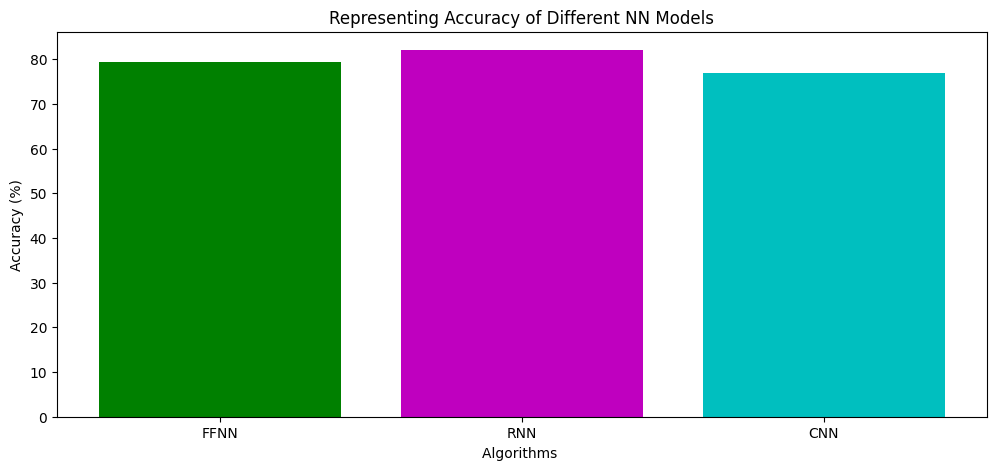

In [ ]:
colors = ['g', 'm', 'c']  # Define colors for each model

plt.figure(figsize=(12, 5))
plt.title("Representing Accuracy of Different NN Models")
plt.xlabel("Algorithms ")
plt.ylabel("Accuracy (%)")
plt.bar(test_accuracy_NN_df['Model'], test_accuracy_NN_df['Test Accuracy'], color=colors)
plt.show()

In [ ]:
#predict pakinson disease function:
def predict_parkinsons_status(features, model):
    # Convert the input features into a numpy array
    features_array = np.array(features).reshape(1, -1)  # Reshape into a 2D array

    # Scale the input features using the previously fitted scaler
    scaled_features = scaler.transform(features_array)

    # Predict the Parkinson's status using the trained SVM model
    prediction = model.predict(scaled_features)

    # Interpret the prediction (1 or 0) to represent status (1: Parkinson's, 0: Healthy)
    if prediction == 1:
        return "Parkinson's Disease Positive"
    else:
        return "Parkinson's Disease Negative"


In [ ]:
features_data = parkinsons_data.drop(columns=['name', 'status'])
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
prediction_result = predict_parkinsons_status(input_data,model_CNN)
print("Prediction:", prediction_result)
# Determine the minimum and maximum values for each feature in the dataset
feature_ranges = {}
for column in features_data.columns:
    min_val = features_data[column].min()
    max_val = features_data[column].max()
    feature_ranges[column] = (min_val, max_val)

# Generate random values for all 22 features based on their ranges
num_sets = 50


for i in range(num_sets):
    random_input = [rd.uniform(feature_ranges[column][0], feature_ranges[column][1]) for column in features_data.columns]
    prediction_result = predict_parkinsons_status(random_input,model_CNN)
    print("Prediction:", prediction_result)